### Importando Librerias

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC


### Cargando el DataSet

In [16]:
df_foods = pd.read_csv('../Data/nutrition.csv')

### DataSet con las columnas o *features* relevantes para el problema.
Primeramente se va crear un nuevo dataset con aquellas columnas o features, que vamos a necesitar para nuestros modelos, esto debido a  que hay muchos valores nutricionales irrevelantes para este caso en particular, pero para otro tipo de analisis si que podrian ser importantes tomarlas en cuenta, se tomara unicamente las siguientes columnas para el analisis:
* calories --> indica la cantidad de calorias de cada alimento, es importante para saber si una comida es saludable o no
* total_fat --> muestra el total de grasas de cada alimento
* cholesterol --> indica el colesterol de cada alimento
* carbohydrate --> indica los carbohidratos de cada alimento
* sugars --> indica la cantidad total de azucares de cada alimento

In [17]:
df_foods = df_foods[['calories','total_fat','cholesterol','carbohydrate','sugars']]

In [52]:
df_foods.head()

,calories,total_fat,cholesterol,carbohydrate,sugars,healthy
0,381,0.1,0,91.27,0.00,0
1,691,72.0,0,13.86,3.97,0
2,25,0.2,0,5.88,3.53,1
3,367,2.4,0,73.13,1.84,0
4,144,2.0,1,30.40,24.32,1


In [33]:
df_foods.describe()

,calories,total_fat,cholesterol,carbohydrate,sugars
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,10.556855,38.723063,22.121915,6.756293
std,169.862001,15.818247,117.358944,27.266261,13.718890
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.000000,0.000000,0.050000,0.000000
50%,191.000000,5.100000,2.000000,9.340000,0.490000
75%,337.000000,14.000000,65.000000,34.910000,6.050000
max,902.000000,100.000000,3100.000000,100.000000,99.800000


In [34]:
df_foods.isna().sum()

calories        0
total_fat       0
cholesterol     0
carbohydrate    0
sugars          0
dtype: int64

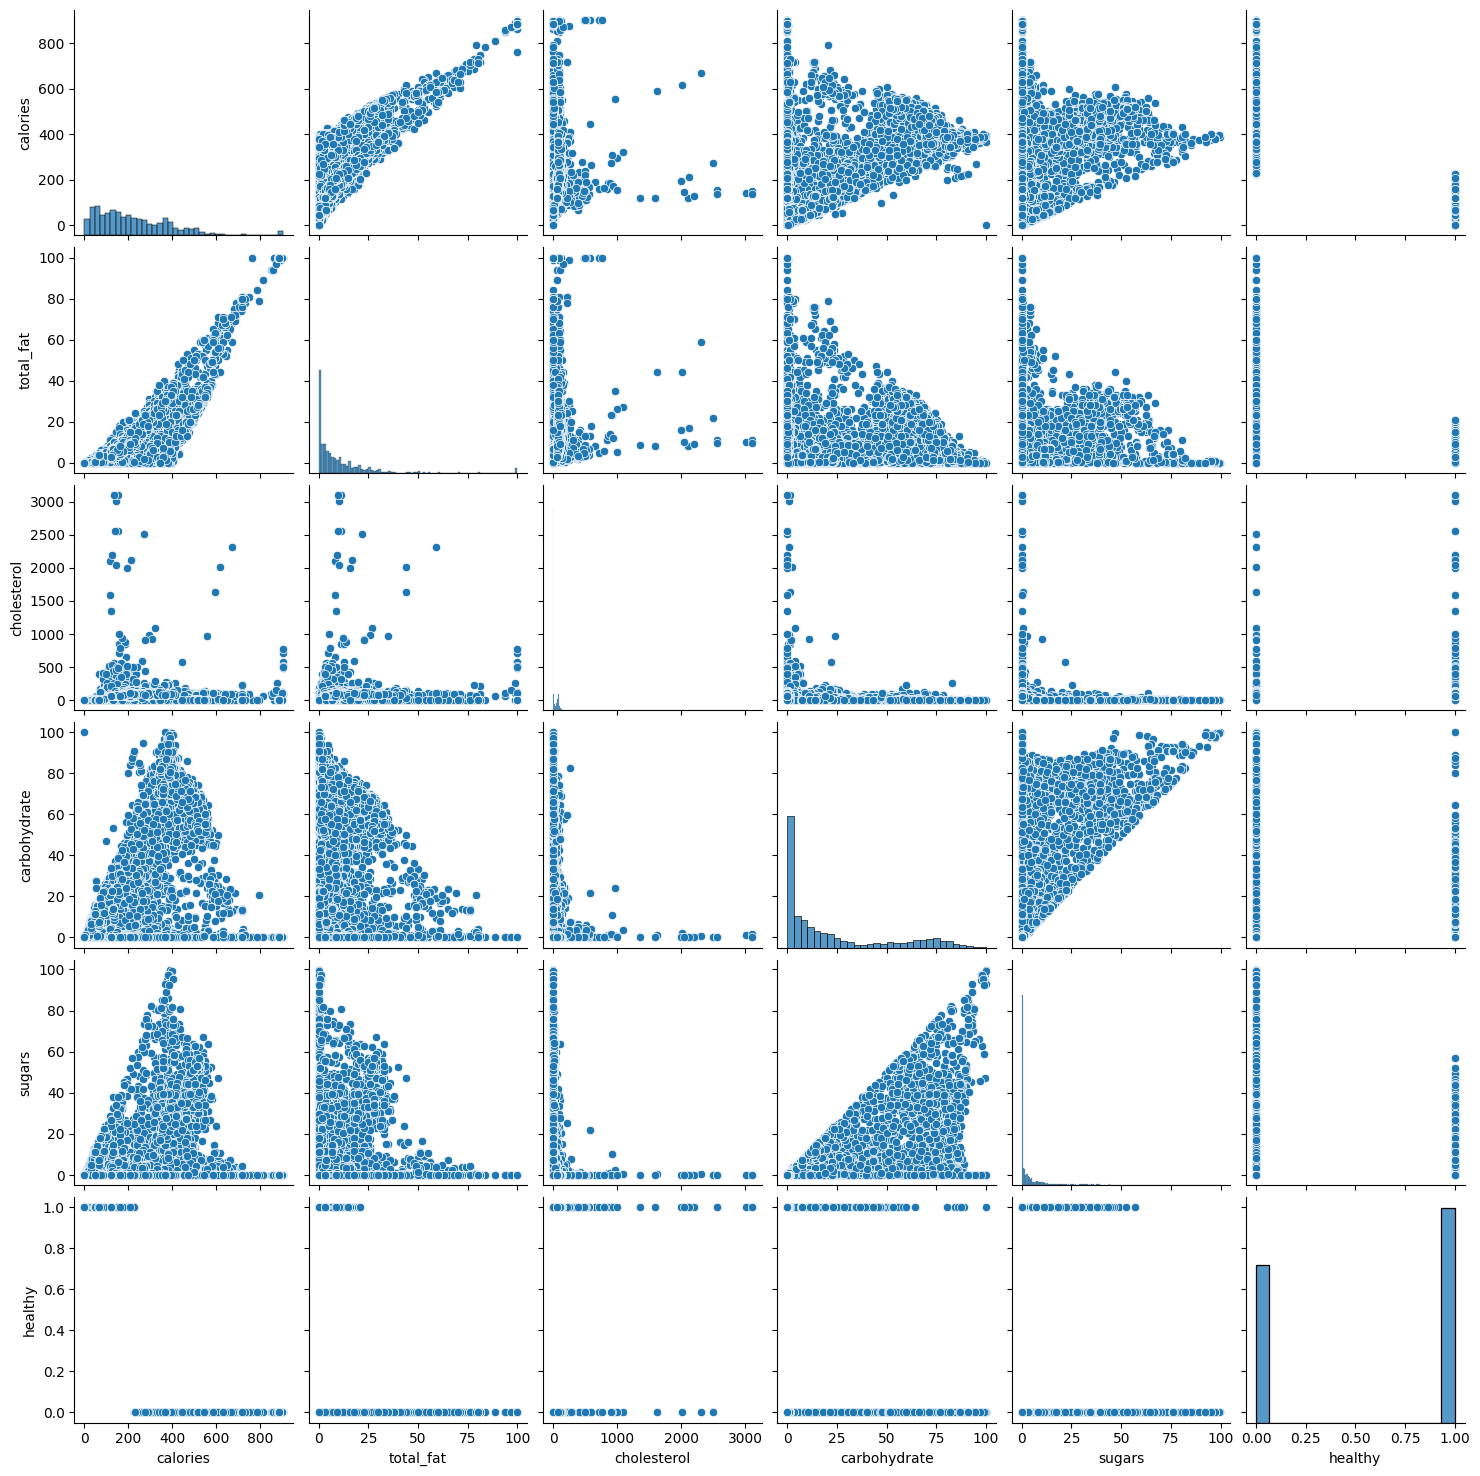

In [57]:
sns.pairplot(df_foods)

### Eliminando las unidades de medida en los valores de las columnas

In [19]:
df_foods['total_fat']=df_foods.loc[:,'total_fat'].replace({'g':''},regex=True)
df_foods['cholesterol']=df_foods.loc[:,'cholesterol'].replace({'mg':''},regex=True)
df_foods['carbohydrate']=df_foods.loc[:,'carbohydrate'].replace({'g':''},regex=True)
df_foods['sugars']=df_foods.loc[:,'sugars'].replace({'g':''},regex=True)

### Convertir tipo Object a Numeric

In [29]:
df_foods['total_fat']=pd.to_numeric(df_foods['total_fat'])
df_foods['cholesterol']=pd.to_numeric(df_foods['cholesterol'])
df_foods['carbohydrate']=pd.to_numeric(df_foods['carbohydrate'])
df_foods['sugars']=pd.to_numeric(df_foods['sugars'])


### Creando la variable **healthy** donde *1* es saludable y *0* no saludable.

In [41]:
calories_mean = df_foods['calories'].mean()
calories_mean

226.28387757424053

In [42]:
df_foods['healthy'] = df_foods.loc[:,'calories'].apply(lambda x: 1 if x<=calories_mean else 0)

### Aplicando MinMaxScaler para tener todas las variables en una misma escala

In [47]:
X = df_foods[['calories','total_fat','cholesterol','carbohydrate','sugars']]
y = df_foods['healthy']
X_new = MinMaxScaler().fit_transform(X)



array([[0.42239468, 0.001     , 0.        , 0.9127    , 0.        ],
       [0.76607539, 0.72      , 0.        , 0.1386    , 0.03977956],
       [0.02771619, 0.002     , 0.        , 0.0588    , 0.03537074],
       ...,
       [0.30709534, 0.23      , 0.02516129, 0.        , 0.        ],
       [0.13414634, 0.03      , 0.01935484, 0.        , 0.        ],
       [0.13414634, 0.03      , 0.01935484, 0.        , 0.        ]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(7031, 5) (1758, 5)


### Aplicando modelo **Regresion Logistica**

In [50]:
model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

## Evaluacion

In [54]:
print('Matriz de Confusion :\n', confusion_matrix(y_test,y_pred))

Matriz de Confusion :
 [[743  26]
 [  4 985]]


In [55]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.9829351535836177


### Aplicando modelo **Support Vector Machine**

In [58]:
model = SVC(gamma='auto').fit(X_train,y_train)

In [60]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

### Evaluacion

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       769
           1       0.98      0.99      0.98       989

    accuracy                           0.98      1758
   macro avg       0.98      0.98      0.98      1758
weighted avg       0.98      0.98      0.98      1758



In [64]:
print(confusion_matrix(y_test,y_pred))

[[746  23]
 [  7 982]]
